In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Scenario

1. Generate time series for a week, every four hours (simulating real data)
2. Interpolate the data such that every minute is available
3. Filter data into above and below criteria
4. Find length of each interval above criteria
5. Calculate average length

In [2]:
from datetime import date
d0 = date(2024, 1, 1)
d1 = date(2024, 2, 1)
delta = d1 - d0
resolution = delta.days * 24 + 1 #24 hours + 1 for midnight

cycles = 360 # number of cycles
length = np.pi * cycles * 2 # 2 controls the order of the wave
offset = 3 #vertical offset

In [3]:
#start_date = '2024-01-01'
#end_date = '2024-02-01'
#date_range = pd.date_range(start=start_date, end=end_date, freq='1H')
#df = pd.DataFrame(index=date_range)
#cycles = 120
#resolution = len(df)
#offset = 3
#length = np.pi * 2 * cycles
#df['Value'] = np.sin(np.arange(0, length, length / resolution)) + offset
frequency_factor = np.random.uniform(1 - 0.5, 1 + 0.5, resolution)
index = pd.date_range(d0, periods=resolution, freq='1H')
series = pd.Series(np.sin(np.arange(0, length, length / resolution) * frequency_factor) * (offset - 0.1) + offset, index = index)

2024-01-01 00:00:00    3.000000
2024-01-01 01:00:00    0.906245
2024-01-01 02:00:00    0.563483
2024-01-01 03:00:00    1.282582
2024-01-01 04:00:00    5.733462
                         ...   
2024-01-31 20:00:00    0.105104
2024-01-31 21:00:00    3.809839
2024-01-31 22:00:00    0.594048
2024-01-31 23:00:00    3.297184
2024-02-01 00:00:00    5.899803
Freq: H, Length: 745, dtype: float64


(473352.0, 473400.0)

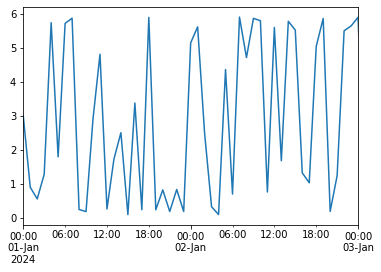

In [5]:
print(series)
ax = series.plot()
ax.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-03'))

# Input Data

# Add interpolation per minute

In [6]:
# add minute information to data
upsampled = series.resample('1min')
interpolated = upsampled.interpolate(method='quadratic')
print(interpolated.head(30))

2024-01-01 00:00:00    3.000000
2024-01-01 00:01:00    2.948513
2024-01-01 00:02:00    2.897588
2024-01-01 00:03:00    2.847225
2024-01-01 00:04:00    2.797425
2024-01-01 00:05:00    2.748187
2024-01-01 00:06:00    2.699512
2024-01-01 00:07:00    2.651399
2024-01-01 00:08:00    2.603849
2024-01-01 00:09:00    2.556861
2024-01-01 00:10:00    2.510435
2024-01-01 00:11:00    2.464572
2024-01-01 00:12:00    2.419272
2024-01-01 00:13:00    2.374533
2024-01-01 00:14:00    2.330357
2024-01-01 00:15:00    2.286744
2024-01-01 00:16:00    2.243693
2024-01-01 00:17:00    2.201204
2024-01-01 00:18:00    2.159278
2024-01-01 00:19:00    2.117914
2024-01-01 00:20:00    2.077113
2024-01-01 00:21:00    2.036874
2024-01-01 00:22:00    1.997198
2024-01-01 00:23:00    1.958084
2024-01-01 00:24:00    1.919532
2024-01-01 00:25:00    1.881543
2024-01-01 00:26:00    1.844116
2024-01-01 00:27:00    1.807251
2024-01-01 00:28:00    1.770949
2024-01-01 00:29:00    1.735210
Freq: T, dtype: float64


(28401120.0, 28404000.0)

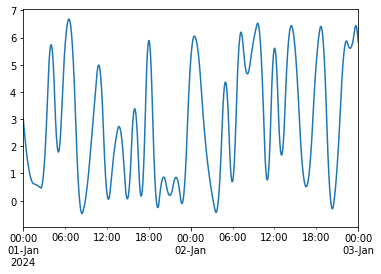

In [11]:
ax = interpolated.plot()
ax.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-3'))

# Define calculation

In [13]:
def find_above_threshold_intervals(data, threshold):
    above_threshold_intervals = []
    above_threshold = False
    start_time = None

    # Iterate through the data
    for i in range(len(data)):
        if data[i] > threshold:
            if not above_threshold:
                above_threshold = True #Sets the data[i] to be true for above above treshold
                start_time = i
        else:
            if above_threshold:
                above_threshold = False #Sets the data[i] to be false for above above treshold
                above_threshold_intervals.append((start_time, i - 1))
                start_time = None

    # Check if the last interval extends until the end of the data
    if above_threshold:
        above_threshold_intervals.append((start_time, len(data) - 1))

    return above_threshold_intervals

def calculate_interval_lengths(intervals):
    lengths = []
    for interval in intervals:
        start_time, end_time = interval
        lengths.append(end_time - start_time + 1)  # Add 1 to include both start and end times
    return lengths

In [14]:
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [16]:
from statistics import mean
example_wave = find_above_threshold_intervals(interpolated,5)
example_interval = calculate_interval_lengths(example_wave)
print(example_wave)
print(example_interval)
print("Average length above threshold is ",mean(example_interval), "minutes")

[(221, 258), (350, 431), (1063, 1098), (1438, 1515), (1847, 1906), (1950, 2050), (2147, 2178), (2269, 2349), (2520, 2592), (2750, 2891), (3279, 3431), (3618, 3662), (3787, 3846), (4065, 4104), (4248, 4258), (4515, 4634), (4908, 4934), (5043, 5068), (5321, 5470), (5849, 5891), (6119, 6191), (6291, 6316), (6529, 6579), (6702, 6736), (8381, 8638), (8656, 8694), (8971, 9022), (9162, 9268), (9467, 9546), (9942, 9978), (10076, 10168), (10419, 10458), (10660, 10695), (10790, 10839), (11024, 11052), (11268, 11357), (11423, 11507), (11626, 11667), (11778, 11836), (11999, 12021), (12132, 12191), (12463, 12500), (12585, 12610), (13003, 13038), (13227, 13276), (13724, 13758), (13909, 13936), (14431, 14456), (14635, 14714), (15617, 15677), (16255, 16269), (17037, 17049), (17171, 17231), (17925, 17954), (18172, 18215), (18252, 18313), (18512, 18612), (18713, 18792), (19135, 19146), (19787, 19838), (19988, 20108), (20335, 20429), (20487, 20546), (20974, 20998), (21154, 21177), (21649, 21680), (22549,

In [17]:
split_interpolated =split_dataframe(interpolated,1440)
for chunk in split_interpolated:
    example_wave = find_above_threshold_intervals(chunk,5)
    example_interval = calculate_interval_lengths(example_wave)
    #print(example_wave)
    print(example_interval)
    print("Average length above threshold is ",mean(example_interval), "minutes for",chunk.index[0].date())

[38, 82, 36, 2]
Average length above threshold is  39.5 minutes for 2024-01-01
[76, 60, 101, 32, 81, 73, 130]
Average length above threshold is  79 minutes for 2024-01-02
[12, 153, 45, 60, 40, 11]
Average length above threshold is  53.5 minutes for 2024-01-03
[120, 27, 26, 150]
Average length above threshold is  80.75 minutes for 2024-01-04
[43, 73, 26, 51, 35]
Average length above threshold is  45.6 minutes for 2024-01-05
[258]
Average length above threshold is  258 minutes for 2024-01-06
[39, 52, 107, 80, 37, 4]
Average length above threshold is  53.166666666666664 minutes for 2024-01-07
[89, 40, 36, 50, 29, 90, 85]
Average length above threshold is  59.857142857142854 minutes for 2024-01-08
[42, 59, 23, 60, 38, 26]
Average length above threshold is  41.333333333333336 minutes for 2024-01-09
[36, 50, 35, 28]
Average length above threshold is  37.25 minutes for 2024-01-10
[26, 80, 61]
Average length above threshold is  55.666666666666664 minutes for 2024-01-11
[15, 13, 61]
Average len

In [273]:
#import math
#from statistics import mean
#def calculate_intervals_daily(data, threshold):
#    start_date = list()
#    lengths = list()
#    chunks = list()
#    index = []
#    num_chunks = len(data) // 1440
#    for i in range(num_chunks):
#        chunks.append(data[i*1440:(i+1)*1440])
#    
#    for chunk in chunks:
#        length = list()
#        above_threshold_intervals = []
#        above_threshold = False
#        start_time = None
#        start_date.append(chunk.index[0])
#    # Iterate through the data
#        for i in range(len(chunk)): #1440 denotes time until the next day
#            if data[i] > threshold:
#                if not above_threshold:
#                    above_threshold = True #Sets the data[i] to be true for above above treshold
#                    start_time = i
#            else:
#                if above_threshold:
#                    above_threshold = False #Sets the data[i] to be false for above above treshold
#                    above_threshold_intervals.append((start_time, i - 1))
#                    start_time = None
#    # Check if the last interval extends until the end of the data
#        if above_threshold:
#            above_threshold_intervals.append((start_time, len(chunk) - 1))
#        for interval in above_threshold_intervals:
#            start_time, end_time = interval
#            length.append(end_time - start_time + 1)  # Add 1 to include both start and end times  
#        lengths.append(mean(length))
#
#    length_series = pd.Series(lengths, index = start_date)
#    return length_series

In [ ]:
#from statistics import mean
#example_wave = find_above_threshold_intervals(interpolated[:2880],5)
#example_interval = calculate_interval_lengths(example_wave)
#print(example_wave)
#print(example_interval)
#print("Average length above threshold is ",mean(example_interval), "minutes")

[(227, 261), (404, 438), (536, 549), (754, 790), (941, 1029), (1133, 1151), (1307, 1444), (1543, 1576), (1667, 1703), (2008, 2067), (2148, 2290), (2394, 2424), (2548, 2594), (2997, 3056), (3174, 3222), (3525, 3573), (3768, 3822), (4421, 4450), (4755, 4813), (5033, 5119), (5390, 5407), (5567, 5606), (5755, 5779), (6237, 6305), (6372, 6468), (6640, 6771), (6881, 6915), (7347, 7392), (7612, 7695), (7848, 7919), (7936, 8049), (8130, 8174), (8386, 8450), (8483, 8518), (8626, 8661), (9103, 9139), (9279, 9327), (9666, 9710), (10011, 10052), (10229, 10246), (10362, 10399), (10741, 10805), (10966, 11012), (11170, 11269), (11371, 11419), (11731, 11757), (12107, 12192), (12458, 12496), (12783, 12794), (12934, 12976), (13115, 13155), (13612, 13631), (14204, 14236), (14669, 14713), (15039, 15111), (15360, 15471), (15745, 15778), (15883, 15918), (16012, 16075), (16297, 16363), (16486, 16524), (16715, 16753), (16850, 16883), (17079, 17120), (17207, 17279), (17502, 17535), (17626, 17662), (17744, 1778

In [275]:
#from statistics import mean
#example_wave = calculate_intervals_daily(interpolated,5)
#example_interval = calculate_interval_lengths(example_wave)
#print(example_wave)
#print(example_interval)
#print(pd.Series(example_interval).describe())
#print("Daily average length above threshold is ",mean(example_interval), "minutes")

2024-01-01    51.714286
2024-01-02    51.714286
2024-01-03    51.714286
2024-01-04    51.714286
2024-01-05    51.714286
2024-01-06    51.714286
2024-01-07    51.714286
2024-01-08    51.714286
2024-01-09    51.714286
2024-01-10    51.714286
2024-01-11    51.714286
2024-01-12    51.714286
2024-01-13    51.714286
2024-01-14    51.714286
2024-01-15    51.714286
2024-01-16    51.714286
2024-01-17    51.714286
2024-01-18    51.714286
2024-01-19    51.714286
2024-01-20    51.714286
2024-01-21    51.714286
2024-01-22    51.714286
2024-01-23    51.714286
2024-01-24    51.714286
2024-01-25    51.714286
2024-01-26    51.714286
2024-01-27    51.714286
2024-01-28    51.714286
2024-01-29    51.714286
2024-01-30    51.714286
2024-01-31    51.714286
dtype: float64
